In [7]:
import numpy as npy
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import random
import shutil
import skimage.feature
import skimage.color

In [9]:
DATADIR = "C:\\Users\\Ayush\\Mini project\DATADIR"
train_dir="C:\\Users\\Ayush\\Mini project\\train_dir"
test_dir="C:\\Users\\Ayush\\Mini project\\test_dir"

os.makedirs(train_dir,exist_ok=True)
os.makedirs(test_dir,exist_ok=True)


In [4]:
for foldername in os.listdir(DATADIR):
    folderpath = os.path.join(DATADIR,foldername)
    train_folderpath = os.path.join(train_dir,foldername)
    test_folderpath = os.path.join(test_dir,foldername)
    
    os.makedirs(train_folderpath,exist_ok=True)
    os.makedirs(test_folderpath,exist_ok=True)

In [5]:
import random
import shutil

for foldername in os.listdir(DATADIR):
    folderpath = os.path.join(DATADIR,foldername)
    train_folderpath = os.path.join(train_dir,foldername)
    test_folderpath = os.path.join(test_dir,foldername)
    
    for filename in os.listdir(folderpath):
        
        if random.random()<0.8:
            dest_dir=train_folderpath
        else:
            dest_dir=test_folderpath
            
        src_path = os.path.join(folderpath,filename)
        dest_path = os.path.join(dest_dir,filename)
        shutil.copy(src_path,dest_path)

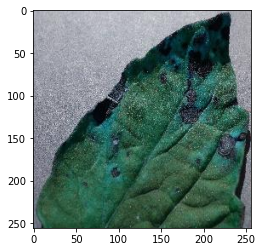

****Training Array Created*****


In [10]:
train_dir="C:\\Users\\Ayush\\Mini project\\train_dir"
CATEGORIES=["Tomato_Early_blight","Tomato_healthy","Tomato_Late_blight","Tomato_Leaf_Mold","Tomato_Septoria_leaf_spot","Tomato_Spider_mites_Two_spotted_spider_mite","Tomato_Target_Spot","Tomato_Tomato_mosaic_virus","Tomato_Tomato_YellowLeaf_Curl_Virus"]

for category in CATEGORIES:
    path= os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
        plt.imshow(img_array)
        plt.show()
        break
    break
print("****Training Array Created*****")


## Normalizing

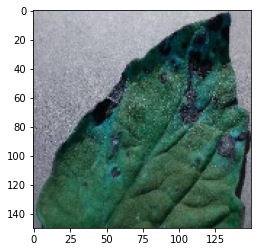

In [12]:
IMG_SIZE =150

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

# GaussianBlur

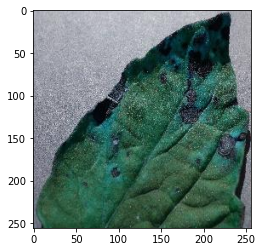

In [13]:

for category in CATEGORIES:
    path= os.path.join(train_dir,category)
    for filename in os.listdir(train_dir):
        blur_img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)

        img_blur=cv2.GaussianBlur(blur_img_array,(5,5),0)
        plt.imshow(blur_img_array)
        plt.show()
        break
    break

# GRAYSCALE

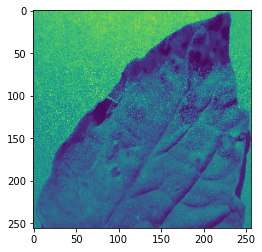

****Training Array Created*****


In [14]:
for category in CATEGORIES:
    path= os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break
    break
print("****Training Array Created*****")

# Otsu Thresholding

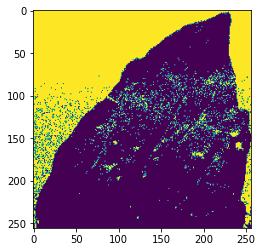

In [15]:
for category in CATEGORIES:
    path=os.path.join(train_dir,category)
    for filename in os.listdir(train_dir):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        _, thresh_img=cv2.threshold(img_array,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        plt.imshow(thresh_img)
        plt.show()
        break
    break

In [24]:
import skimage.feature
import skimage.color
import cv2


img = cv2.imread('C:\\Users\\Ayush\\Mini project\\train_dir\\Tomato_Early_blight\\Tomato_Early_Blight(0001).JPG')


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

patches = skimage.util.view_as_windows(gray_img, window_shape=(32, 32), step=16)

haralick_feats = []
for patch in patches:
    glcm = skimage.feature.greycomatrix(patch, [1], [0], levels=256, normed=True)
    feats = skimage.feature.greycoprops(glcm, prop=['energy', 'contrast', 'homogeneity'])
    haralick_feats.append(feats.flatten())

mean_feats = npy.mean(haralick_feats, axis=0)
std_feats = npy.std(haralick_feats, axis=0)

heatmap = npy.reshape(mean_feats, (8, 8))
plt.imshow(heatmap, cmap='hot')
plt.show()

ValueError: The parameter `image` must be a 2-dimensional array